# Apple Stock

### Step 1.필요한 librarie들을 import 하세요

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize = (10,6))

### Step 2. 다음과 같은 DataSet을 import 하세요 [address](https://raw.githubusercontent.com/myoh0623/dataset/main/appl_1980_2014.csv)

In [108]:
url = 'https://raw.githubusercontent.com/myoh0623/dataset/main/appl_1980_2014.csv'

### Step 3. apple 라는 변수에 DataFrame을 할당 하세요

In [109]:
apple = pd.read_csv(url)
apple.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4. 각 column들의 data type을 확인하세요

In [111]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Date column을 datetime type으로 변경하세요

In [112]:
apple.Date = pd.to_datetime(apple.Date)
apple.Date

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 6. Date column을 index로 설정하세요

In [113]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7. 중복된 date가 존재 하는지 확인하세요

In [116]:
apple.index.is_unique

True

### Step 8. index를 오름차순으로 정렬하세요.

In [117]:
# apple.sort_index()
apple = apple.sort_values(by = 'Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. 매월 마지막 영업일 가져오세요 (business day of each month)

In [121]:
apple.resample('BM').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


### Step 10. 주가가 등록된 첫날과 마지막 날의 차이는 몇일인가요?

In [128]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11. 영업달 기준으로 몇달간의 데이터가 저장되어있나요?

In [129]:
len(apple.resample('BM').size())

404

### Step 12. 'Adj Close'값을 이용해 종가 그래프를 그려보세요
- `plt.plot`
- 코드를 강사와 공유해 보세요

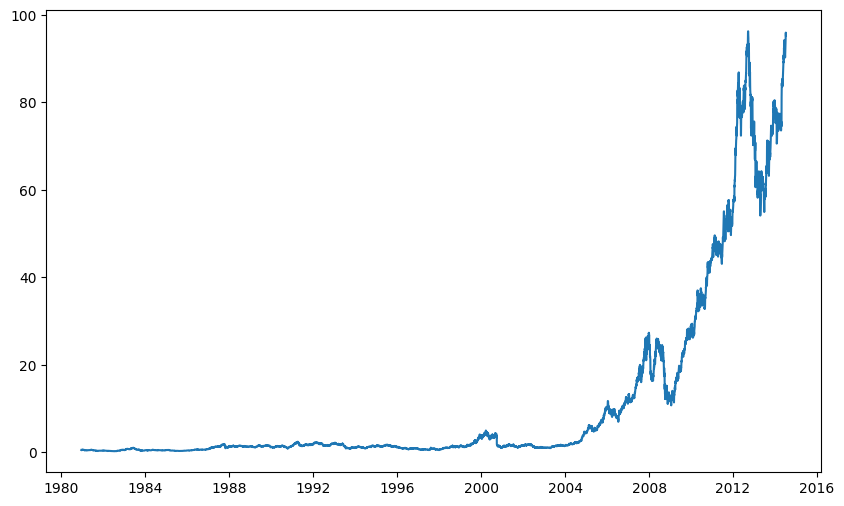

In [131]:
#강사님 풀이
fig, ax_1 = plt.subplots()
ax_1.plot(apple.index, apple["Adj Close"])

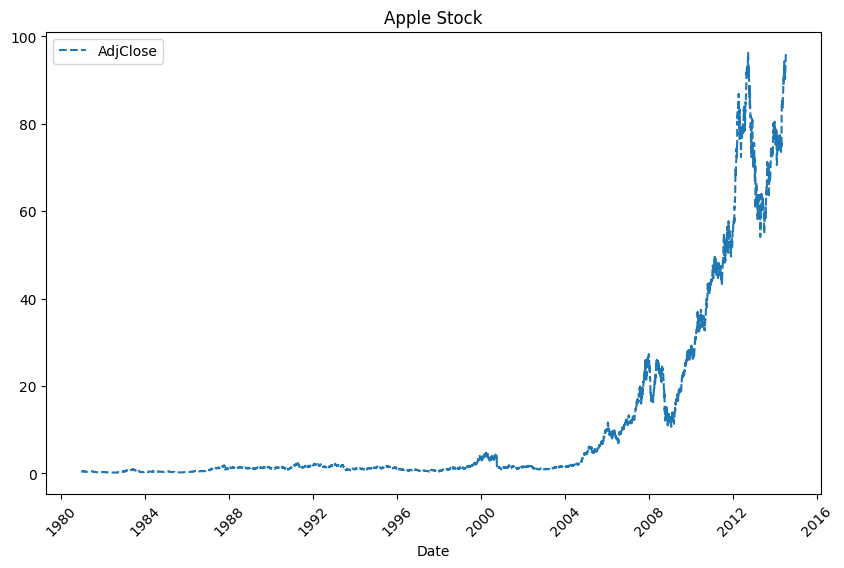

In [103]:
plt.plot(apple.index, apple["Adj Close"],linestyle = 'dashed', label = 'AdjClose')
plt.xticks(rotation = 45)
# plt.axis([1983,2016,0,100])
# plt.xticks(range(1980,2015,4))
plt.title('Apple Stock')
plt.xlabel('Date')
plt.legend()
plt.show()

#참고: 주가와 거래량을 동시에 표현



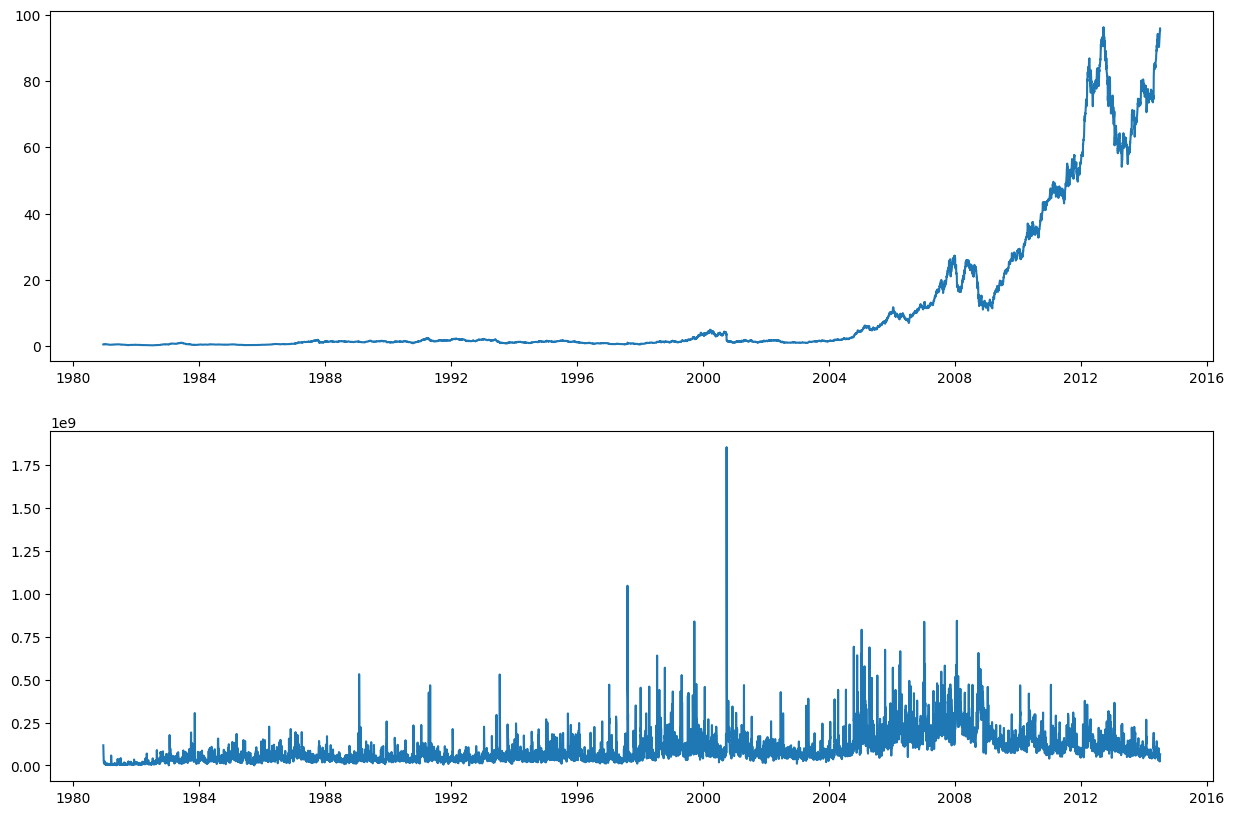

In [133]:
#강사님 풀이
fig = plt.figure()
ax_1 = fig.add_subplot(2,1,1)
ax_1.plot(apple.index, apple["Adj Close"])

ax_2 = fig.add_subplot(2,1,2)
ax_2.plot(apple.index, apple["Volume"])

fig.set_size_inches(15,10)